https://www.kaggle.com/code/riodelacour/globo-model-creation
https://www.kaggle.com/code/riodelacour/globo-dataset-analysis

# 1. Libraries import

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import os
import pickle
from time import time
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. Dataset files exploration : clicks folder

In [5]:
click_filelist = sorted(os.listdir("clicks"))
click_list = []
# Iterate over files in folder and list
for i in range(0, len(click_filelist)):
    # Read CSV file (i order)
    temp = pd.read_csv("clicks/" + click_filelist[i])
    # Create a specific column to track the file number
    temp['filename'] = i
    # Append to list
    click_list.append(temp)

# Concate in unique DF
clicks = pd.concat(click_list, axis=0, ignore_index=True)

# Rename columns
clicks.rename(columns={'click_article_id':'article_id'}, inplace=True)

# Convert date string to datetime
date2convert = ['session_start', 'click_timestamp']
for col in date2convert:
    clicks[col] = pd.to_datetime(clicks[col], unit='ms')

# Display shape and 5 first rows
print('Données de clics: ', clicks.shape)
clicks.head()

Données de clics:  (2988181, 13)


,user_id,session_id,session_start,session_size,article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,filename
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2,0
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2,0
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2,0
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2,0
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2,0


- user_id: the unique identifier of the user
- session_id: the unique identifier of the session; in a session, a - user may have consulted several articles;
- session_start: the timestamp of the 1st interaction of the session;
- session_size: the number of interactions during the session;
- click_article_id: the article viewed by the user (1 or more);
- click_timestamp: the timestamp of the interaction;
- click_environment: the identifier of the environment (1-Facebook,2-Mobile App 3-Mobile Pages 4-Web);
- click_deviceGroup: the type of device used (1-tablet, 2-TV, 4-Mobile, 5-Computer, or 3-blank);
- click_os: the operating system identifier (1-Other, 2-iOS, 3-Android, 4-Windows Phone, 5-Windows Mobile, 6-Windows, 7-Mac OS X, 8-Mac OS, 9- Samsung, 10-FireHbbTV, 11-ATV OS X, 12-tvOS, 13-Chrome OS, 14-Debian, 15-Symbian OS, 16-BlackBerry OS, 17-Firefox OS, 18-Android, 19-Brew MP, 20 -Chromecast, 21-webOS, 22-Gentoo, 23-Solaris);
- click_country: the country identifier;
- click_region: the region;
- click_referrer_type: (No information).

In [6]:
# Check unique values per column
print('=== Unique values of interactions dataframe ===')
print('=================================================================')
for col in clicks.columns:
    print(col, ' :', clicks[col].nunique())

=== Unique values of interactions dataframe ===
user_id  : 322897
session_id  : 1048594
session_start  : 646874
session_size  : 72
article_id  : 46033
click_timestamp  : 2983198
click_environment  : 3
click_deviceGroup  : 5
click_os  : 8
click_country  : 11
click_region  : 28
click_referrer_type  : 7
filename  : 384


# 3. Dataset files exploration : articles_metadata.csv

In [7]:
articles = pd.read_csv('articles_metadata.csv')

# Convert date string to datetime type
articles['created_at_ts'] = pd.to_datetime(
    (pd.to_datetime(
        articles['created_at_ts'],
        unit='ms')).dt.strftime('%Y/%m/%d'))
print('Min/Max creation date:', articles['created_at_ts'].min(),
      '/ ', articles['created_at_ts'].max())

# Display shape and 5 first rows
print('Métadonnées des articles: ', articles.shape)
articles.head()

Min/Max creation date: 2006-09-27 00:00:00 /  2018-03-13 00:00:00
Métadonnées des articles:  (364047, 5)


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,2017-12-13,0,168
1,1,1,2014-07-14,0,189
2,2,1,2014-08-22,0,250
3,3,1,2014-08-19,0,230
4,4,1,2014-08-03,0,162


In [8]:
# Check unique values per column
print('=== Unique values of metadata dataframes ===')
print('=============================================================')
for col in articles.columns:
    print(col, ' :', articles[col].nunique())

=== Unique values of metadata dataframes ===
article_id  : 364047
category_id  : 461
created_at_ts  : 2302
publisher_id  : 1
words_count  : 866


4. Dataset files exploration : embeddings pickle

In [9]:
# Load pickle data
with open(os.path.join('articles_embeddings.pickle'), 'rb') as file:
    embeddings = pickle.load(file)

# Save as dataframe
df_embeddings = pd.DataFrame(embeddings)
df_embeddings = df_embeddings.add_prefix('dim_')

# Display shape and 5 first rows
print('Articles embeddings shape: ', df_embeddings.shape)
df_embeddings.head()

/var/folders/ww/n5qp3lj11bq3jsl9nv331j2m0000gn/T/ipykernel_26653/2987032152.py:3: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  embeddings = pickle.load(file)


Articles embeddings shape:  (364047, 250)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_240,dim_241,dim_242,dim_243,dim_244,dim_245,dim_246,dim_247,dim_248,dim_249
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


# 5. Key insights of the dataset

In [10]:
# Print information
print('Sessions start from {} to {}'.format(clicks.session_start.min(), clicks.session_start.max()))

Sessions start from 2017-10-01 02:37:03 to 2017-10-17 03:36:19


In [11]:
print('Clicks period starts from {} to {}'.format(clicks.click_timestamp.min(), clicks.click_timestamp.max()))

Clicks period starts from 2017-10-01 03:00:00.026000 to 2017-11-13 20:04:14.886000


In [12]:
# Filter DF on necessary features
df0 = clicks[['user_id', 'session_id', 'session_start', 'click_timestamp']]

# Calculate the difference to previous row on timestamp
df1 = pd.DataFrame(
    df0.groupby(['user_id','session_id', 'session_start'],
                as_index=False)['click_timestamp'].diff().fillna(pd.Timedelta(seconds=0)))

# Rename column
df1.rename(columns={'click_timestamp':'delta_w_previous'}, inplace=True)

# Join result with previous df
views = df0.join(df1)

# Create new feature with timestamp difference
views['end_article_view'] = views['click_timestamp'] - views['session_start']

# Create new feature by applying conditions and converting timestamp to seconds
views['view_duration'] = np.where(round(views['delta_w_previous'].dt.total_seconds(),0) == 0,
                             round(views['end_article_view'].dt.total_seconds(), 0),
                             round(views['delta_w_previous'].dt.total_seconds(), 0))

# Display 5 first rows
views.head()

,user_id,session_id,session_start,click_timestamp,delta_w_previous,end_article_view,view_duration
0,0,1506825423271737,2017-10-01 02:37:03,2017-10-01 03:00:28.020,0 days 00:00:00,0 days 00:23:25.020000,1405.0
1,0,1506825423271737,2017-10-01 02:37:03,2017-10-01 03:00:58.020,0 days 00:00:30,0 days 00:23:55.020000,30.0
2,1,1506825426267738,2017-10-01 02:37:06,2017-10-01 03:03:37.951,0 days 00:00:00,0 days 00:26:31.951000,1592.0
3,1,1506825426267738,2017-10-01 02:37:06,2017-10-01 03:04:07.951,0 days 00:00:30,0 days 00:27:01.951000,30.0
4,2,1506825435299739,2017-10-01 02:37:15,2017-10-01 03:04:50.575,0 days 00:00:00,0 days 00:27:35.575000,1656.0


In [13]:
# Check 1 user
views[views.user_id == 68]

,user_id,session_id,session_start,click_timestamp,delta_w_previous,end_article_view,view_duration
180,68,1506826396181805,2017-10-01 02:53:16,2017-10-01 23:26:26.082,0 days 00:00:00,0 days 20:33:10.082000,73990.0
181,68,1506826396181805,2017-10-01 02:53:16,2017-10-01 23:30:31.121,0 days 00:04:05.039000,0 days 20:37:15.121000,245.0
182,68,1506826396181805,2017-10-01 02:53:16,2017-10-01 23:32:33.364,0 days 00:02:02.243000,0 days 20:39:17.364000,122.0
183,68,1506826396181805,2017-10-01 02:53:16,2017-10-03 02:35:24.157,1 days 03:02:50.793000,1 days 23:42:08.157000,97371.0
184,68,1506826396181805,2017-10-01 02:53:16,2017-10-03 02:35:54.157,0 days 00:00:30,1 days 23:42:38.157000,30.0
528189,68,1507040027288752,2017-10-03 14:13:47,2017-10-03 14:15:18.994,0 days 00:00:00,0 days 00:01:31.994000,92.0
528190,68,1507040027288752,2017-10-03 14:13:47,2017-10-05 01:04:38.792,1 days 10:49:19.798000,1 days 10:50:51.792000,125360.0
528191,68,1507040027288752,2017-10-03 14:13:47,2017-10-05 01:05:08.792,0 days 00:00:30,1 days 10:51:21.792000,30.0
2003920,68,1507664316334864,2017-10-10 19:38:36,2017-10-10 19:42:13.873,0 days 00:00:00,0 days 00:03:37.873000,218.0
2003921,68,1507664316334864,2017-10-10 19:38:36,2017-10-10 19:42:43.873,0 days 00:00:30,0 days 00:04:07.873000,30.0


In [14]:
# Check 1 user
views[views.user_id == 320431]

,user_id,session_id,session_start,click_timestamp,delta_w_previous,end_article_view,view_duration
2941940,320431,1508183187238264,2017-10-16 19:46:27,2017-10-17 11:50:50.064,0 days 00:00:00,0 days 16:04:23.064000,57863.0
2941941,320431,1508183187238264,2017-10-16 19:46:27,2017-10-23 11:46:15.555,5 days 23:55:25.491000,6 days 15:59:48.555000,518125.0
2941942,320431,1508183187238264,2017-10-16 19:46:27,2017-10-26 13:16:13.801,3 days 01:29:58.246000,9 days 17:29:46.801000,264598.0
2941943,320431,1508183187238264,2017-10-16 19:46:27,2017-10-27 12:30:42.714,0 days 23:14:28.913000,10 days 16:44:15.714000,83669.0
2941944,320431,1508183187238264,2017-10-16 19:46:27,2017-11-03 11:52:38.700,6 days 23:21:55.986000,17 days 16:06:11.700000,602516.0
2941945,320431,1508183187238264,2017-10-16 19:46:27,2017-11-03 19:17:54.249,0 days 07:25:15.549000,17 days 23:31:27.249000,26716.0
2941946,320431,1508183187238264,2017-10-16 19:46:27,2017-11-13 20:03:44.886,10 days 00:45:50.637000,28 days 00:17:17.886000,866751.0
2941947,320431,1508183187238264,2017-10-16 19:46:27,2017-11-13 20:04:14.886,0 days 00:00:30,28 days 00:17:47.886000,30.0


# session per user, Mean: 3.2 - Min: 1, Max: 207.


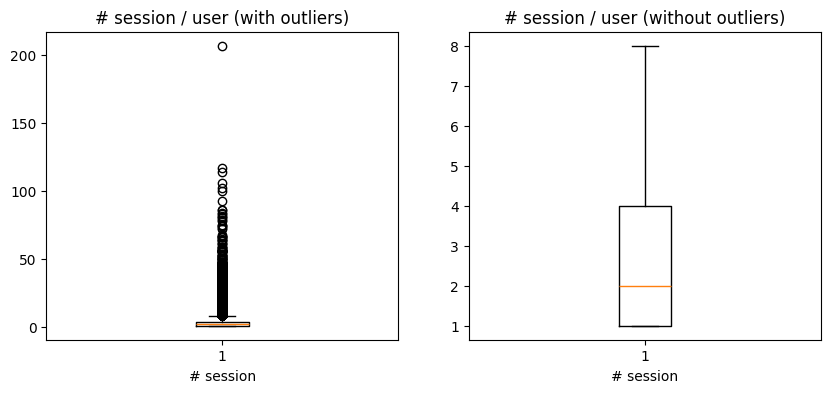

In [15]:
# Print information
x = clicks.groupby(['user_id'])['session_id'].nunique()
print(
    '# session per user, Mean: {} - Min: {}, Max: {}.'.format(round(x.mean(), 1),
                                                              x.min(),
                                                              x.max()))

# Plot boxplot
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(10, 4))
ax1.boxplot(x)
ax1.set_xlabel('# session')
ax1.set_title('# session / user (with outliers)')
ax2.boxplot(x, showfliers=False)
ax2.set_xlabel('# session')
ax2.set_title('# session / user (without outliers)')
plt.show()

<Axes: title={'center': 'Sessions distribution'}, xlabel='session_size'>

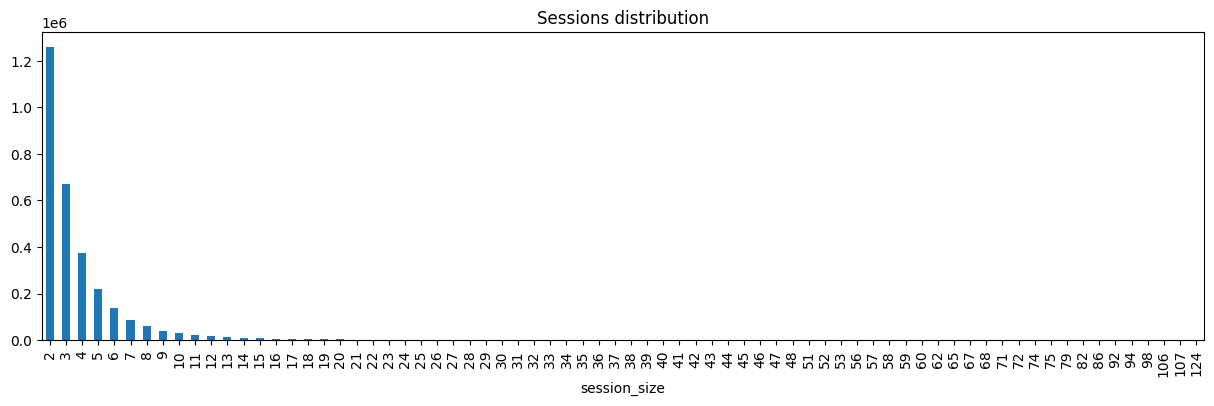

In [16]:
# Plot bar with groupby
clicks.groupby('session_size').size().plot(kind='bar', figsize=(15, 4),
                                           title='Sessions distribution')

<Axes: title={'center': '# user per state'}, xlabel='click_country'>

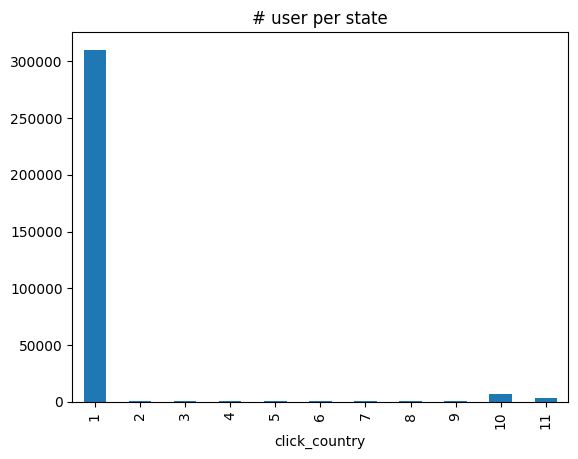

In [17]:
# Plot month_day distribution
clicks.groupby('click_country')['user_id'].nunique().plot(kind='bar', title='# user per state')

<Axes: title={'center': '# user per state and region'}, xlabel='click_country,click_region'>

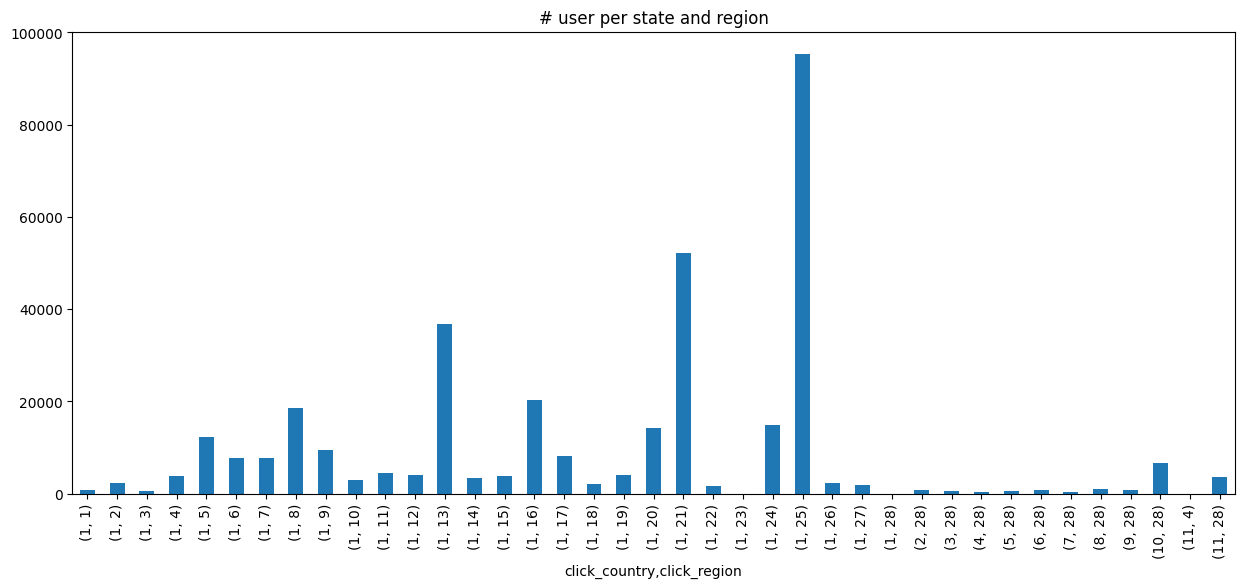

In [18]:
# Plot month_day distribution
clicks.groupby(['click_country', 'click_region'])['user_id'].nunique().plot(kind='bar', figsize=(15, 6), title='# user per state and region')

<Axes: title={'center': '# articles par jour'}, xlabel='session_start'>

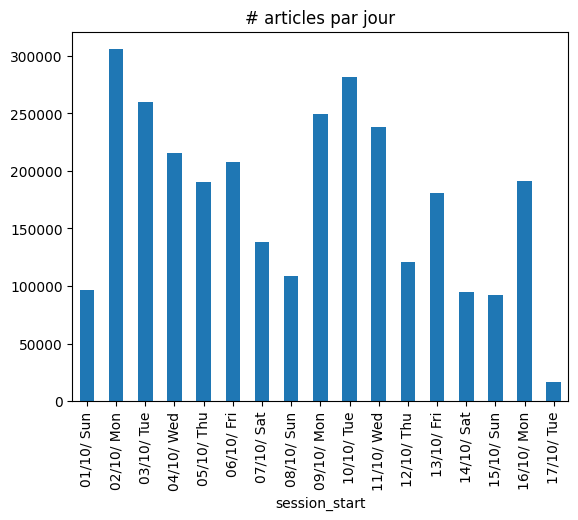

In [19]:
# Plot month_day distribution
clicks.groupby(clicks['session_start'].dt.strftime('%d/%m/ %a')).size().plot(kind='bar', title='# articles par jour')

<function matplotlib.pyplot.show(close=None, block=None)>

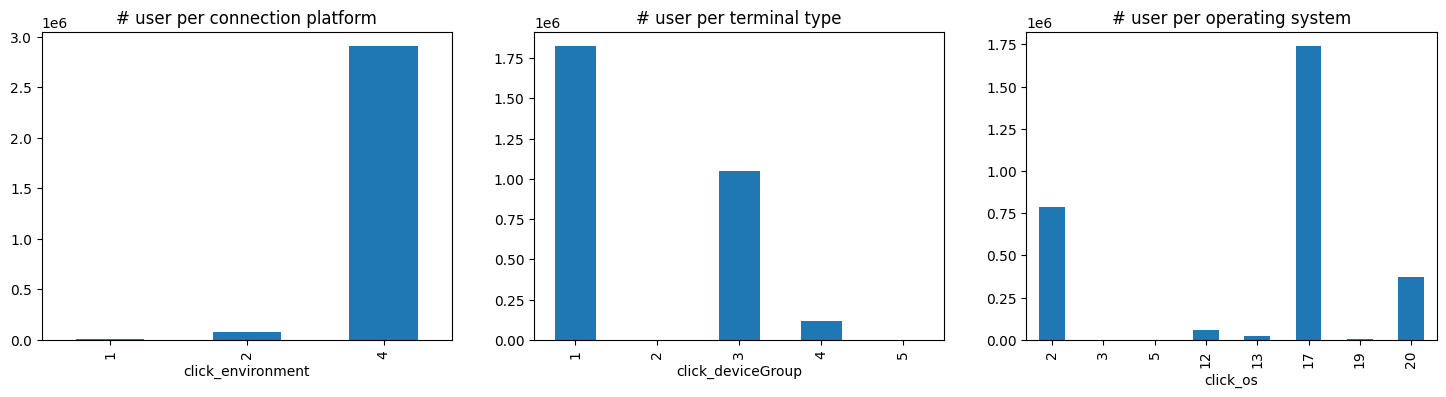

In [20]:
a = clicks.groupby('click_environment')['user_id'].count()
b = clicks.groupby('click_deviceGroup')['user_id'].count()
c = clicks.groupby('click_os')['user_id'].count()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
a.plot(kind='bar', title='# user per connection platform', ax=ax1)
b.plot(kind='bar', title='# user per terminal type', ax=ax2)
c.plot(kind='bar', title='# user per operating system', ax=ax3)
plt.show

In [21]:
# Merge DF
clicks_articles = pd.merge(clicks, articles, how='inner', on='article_id')

# Convert timestamp to datetime
clicks_articles['session_start'] = pd.to_datetime(clicks_articles['session_start'].dt.strftime('%Y/%m/%d'))
clicks_articles['click_timestamp'] = pd.to_datetime(clicks_articles['click_timestamp'].dt.strftime('%Y/%m/%d'))

# Display shape and 5 first rows
print(clicks_articles.shape)
clicks_articles.head()

(2988181, 17)


,user_id,session_id,session_start,session_size,article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,filename,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,2017-10-01,2,157541,2017-10-01,4,3,20,1,20,2,0,281,2017-09-30,0,280
1,0,1506825423271737,2017-10-01,2,68866,2017-10-01,4,3,20,1,20,2,0,136,2017-10-01,0,226
2,1,1506825426267738,2017-10-01,2,235840,2017-10-01,4,1,17,1,16,2,0,375,2017-09-30,0,159
3,1,1506825426267738,2017-10-01,2,96663,2017-10-01,4,1,17,1,16,2,0,209,2017-09-30,0,206
4,2,1506825435299739,2017-10-01,2,119592,2017-10-01,4,1,17,1,24,2,0,247,2017-09-30,0,239


<function matplotlib.pyplot.show(close=None, block=None)>

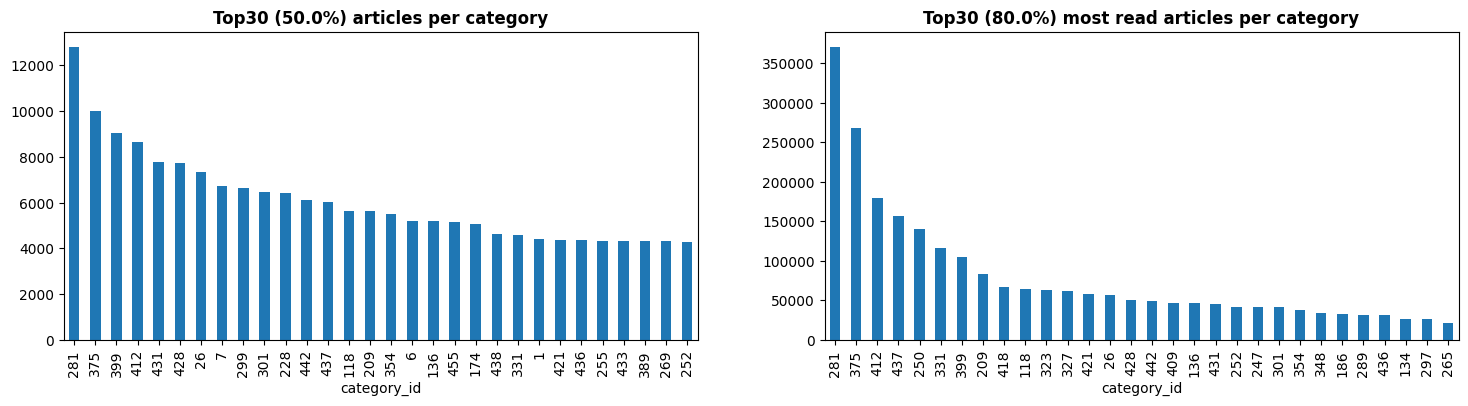

In [22]:
# Plot nb articles per categorie
d = articles.groupby('category_id')['article_id'].nunique().sort_values(ascending=False)
e = clicks_articles.groupby('category_id')['article_id'].count().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
d.head(30).plot(kind='bar', ax=ax1)
ax1.set_title('Top30 ({}%) articles per category'.format(
    round(sum(d.head(30))/sum(d) * 100, 0)),
    fontsize=12, fontweight='bold')
e.head(30).plot(kind='bar', ax=ax2)
ax2.set_title('Top30 ({}%) most read articles per category'.format(
    round(sum(e.head(30))/sum(e) * 100, 0)),
    fontsize=12, fontweight='bold')
plt.show

In [23]:
# Find intersection (lst1 order)
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

print(intersection(d.head(30).index.to_list(), e.head(30).index.to_list()))

[281, 375, 399, 412, 431, 428, 26, 301, 442, 437, 118, 209, 354, 136, 331, 421, 436, 252]


# word per article, Mean: 191.0 - Min: 0, Max: 6690.
Half of articles have between159.0 and 218.0 words


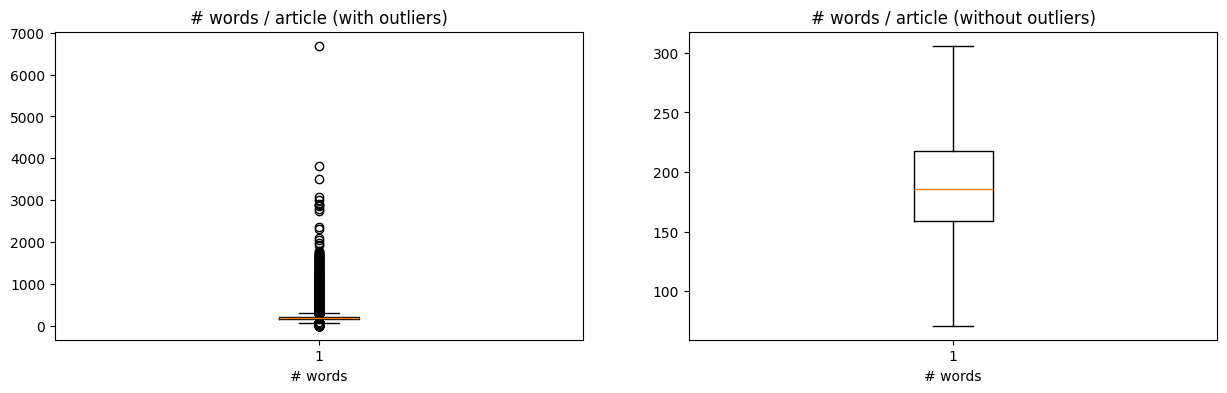

In [24]:
# Print information
x = articles['words_count']
print(
    '# word per article, Mean: {} - Min: {}, Max: {}.'.format(round(x.mean(), 0),
                                                              x.min(),
                                                              x.max()))
print('Half of articles have between{} and {} words'.format(x.quantile(.25),
                                                                      x.quantile(.75)))

# Plot boxplot
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(15, 4))
ax1.boxplot(x)
ax1.set_xlabel('# words')
ax1.set_title('# words / article (with outliers)')
ax2.boxplot(x, showfliers=False)
ax2.set_xlabel('# words')
ax2.set_title('# words / article (without outliers)')
plt.show()

In [25]:
# Focus on articles without words_count
print('Number of articles involved: ', len(articles[articles['words_count'] == 0]))
articles[articles['words_count'] == 0]

Number of articles involved:  35


,article_id,category_id,created_at_ts,publisher_id,words_count
35491,35491,43,2016-08-04,0,0
38472,38472,51,2011-04-21,0,0
39043,39043,64,2014-06-30,0,0
39054,39054,64,2015-01-21,0,0
164414,164414,288,2015-03-30,0,0
206233,206233,331,2017-09-30,0,0
212323,212323,343,2010-04-19,0,0
212324,212324,343,2010-04-16,0,0
212327,212327,343,2014-08-11,0,0
212526,212526,347,2018-01-28,0,0


In [26]:
# Calculate view recency
clicks_articles['view_recency'] = clicks_articles['click_timestamp'] - clicks_articles['created_at_ts']
clicks_articles['view_recency'] = (clicks_articles['view_recency'] / pd.Timedelta(days=1))

# Filter article by popularity
articles_popularity = clicks_articles.groupby('article_id', as_index=False)['click_timestamp'].count()
articles_popularity.rename(columns={'click_timestamp':'nbClicks'}, inplace=True)
articles_popularity.sort_values(by=['nbClicks'], ascending=False, inplace=True)

# Keep only the top 10 articles for analysis
articles_top10 = articles_popularity.head(10)

# Merge the top10 with 1st DF to track creation and start session date
articles_top10 = pd.merge(articles_top10, clicks_articles, on='article_id')

# Ensure there is no inconsistent data
articles_top10 = articles_top10[articles_top10.view_recency >= 0]
print('Top10 articles interactions shape: ', articles_top10.shape)

# Create DF with only the top10 articles
top10_clicks_per_day = pd.DataFrame(
    articles_top10.groupby(['article_id','view_recency'], as_index=False)['click_timestamp'].count())

# Display shape and 5 first rows
print('Top10 articles views shape: ', top10_clicks_per_day.shape)
top10_clicks_per_day.head()

Top10 articles interactions shape:  (240861, 19)
Top10 articles views shape:  (94, 3)


,article_id,view_recency,click_timestamp
0,96210,0.0,1252
1,96210,1.0,17613
2,96210,2.0,2663
3,96210,3.0,34
4,96210,4.0,12


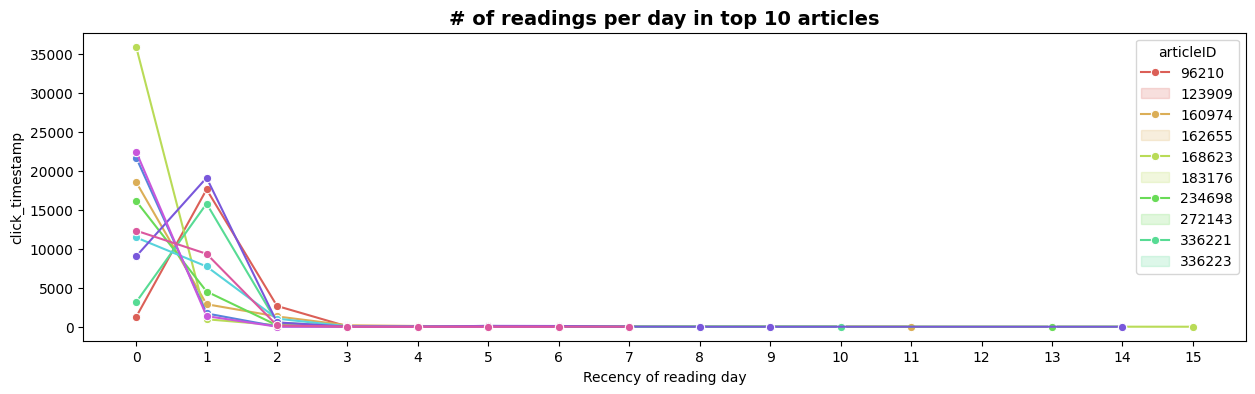

In [27]:
# Plot articles view per 1st day to 15th day
plt.figure(figsize=(15, 4))
palette = sns.color_palette('hls', 10)
sns.lineplot(x=top10_clicks_per_day['view_recency'],
             y=top10_clicks_per_day['click_timestamp'],
             hue=top10_clicks_per_day['article_id'],
             data=top10_clicks_per_day,
             palette=palette,
             marker='o')
plt.xticks(range(0, len(top10_clicks_per_day.view_recency.unique())+1))
plt.xlabel('Recency of reading day')
plt.legend(top10_clicks_per_day.article_id.unique(), title='articleID')
plt.title('# of readings per day in top 10 articles',
          fontsize=14, fontweight='bold')
plt.show()
